<a href="https://colab.research.google.com/github/Ishita0807/Automobile-Sales-Service-Analytics/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta


In [ ]:
brands = {
    "Hyundai": ["i20", "Creta", "Venue", "Verna"],
    "Tata": ["Nexon", "Harrier", "Safari", "Tiago"],
    "Maruti": ["Baleno", "Swift", "Dzire", "Brezza"],
    "Kia": ["Seltos", "Sonet", "Carens", "EV6"]
}
regions = ["North", "South", "East", "West"]
dealers = ["Elite Motors", "Wheels Auto", "DriveNow", "SpeedX", "Metro Cars"]
sale_types = ["New", "Used"]
issues = ["Brake Issue", "Battery Fault", "Engine Overheat", "AC Failure", "Suspension Problem", "Transmission Lag"]

start_date = datetime(2023, 1, 1)


In [ ]:
sales_data = []
for i in range(1, 101):
    brand = random.choice(list(brands.keys()))
    model = random.choice(brands[brand])
    sale_date = start_date + timedelta(days=random.randint(0, 364))
    price = random.randint(600000, 2000000)
    sales_data.append({
        "Sale_ID": f"S{i:03d}",
        "Date": sale_date.strftime("%Y-%m-%d"),
        "Region": random.choice(regions),
        "Dealer_Name": random.choice(dealers),
        "Vehicle_Model": model,
        "Brand": brand,
        "Price": price,
        "Quantity": 1,
        "Sale_Type": random.choice(sale_types)
    })


In [ ]:
sales_df = pd.DataFrame(sales_data)
sales_df.to_csv("automobile_sales.csv", index=False)


In [ ]:
service_data = []
for i in range(1, 101):
    brand = random.choice(list(brands.keys()))
    model = random.choice(brands[brand])
    service_date = start_date + timedelta(days=random.randint(0, 364))
    cost = random.randint(1000, 8000)
    satisfaction = random.randint(1, 5)
    service_data.append({
        "Service_ID": f"SV{i:03d}",
        "Date": service_date.strftime("%Y-%m-%d"),
        "Region": random.choice(regions),
        "Dealer_Name": random.choice(dealers),
        "Vehicle_Model": model,
        "Issue_Type": random.choice(issues),
        "Cost": cost,
        "Resolution_Time_Hrs": random.randint(2, 12),
        "Customer_Satisfaction": satisfaction
    })

service_df = pd.DataFrame(service_data)
service_df.to_csv("automobile_service.csv", index=False)


In [ ]:
sales_df = pd.read_csv("automobile_sales.csv")
service_df = pd.read_csv("automobile_service.csv")


sales_df['Date'] = pd.to_datetime(sales_df['Date'])
service_df['Date'] = pd.to_datetime(service_df['Date'])


**EXPLORATORY DATA ANALYSIS**

**Monthly Sales Revenue**


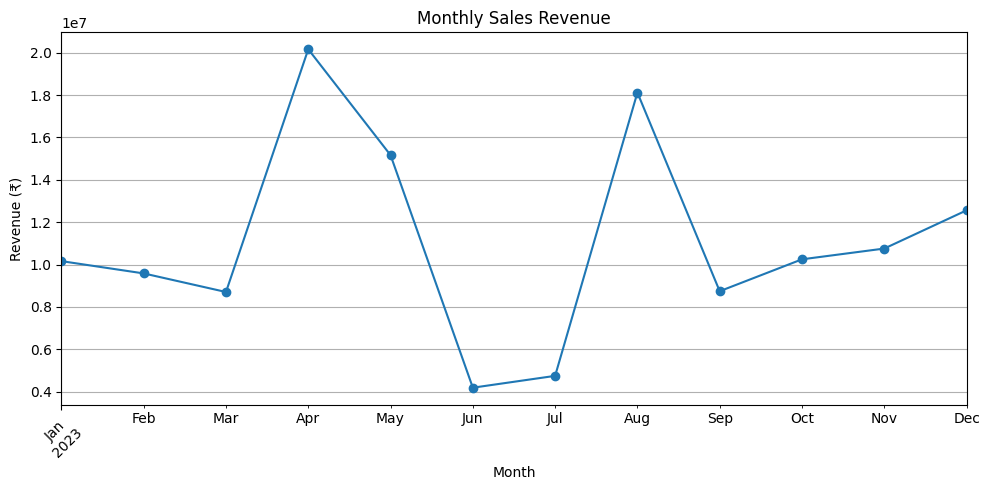

In [ ]:
sales_df['Month'] = sales_df['Date'].dt.to_period('M')
monthly_sales = sales_df.groupby('Month')['Price'].sum()

monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Revenue', ylabel='Revenue (₹)', figsize=(10,5))
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

**Sales by Region**

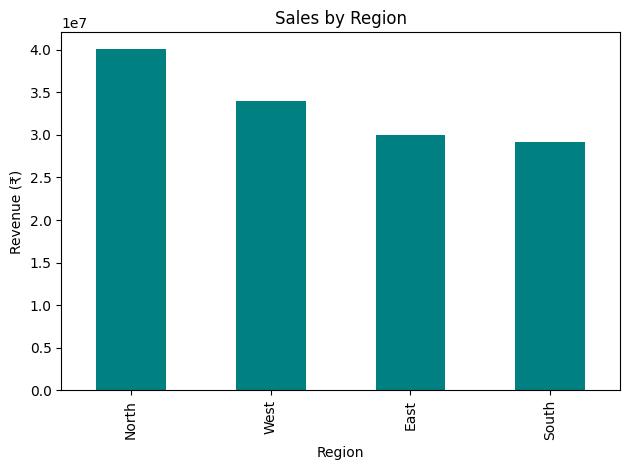

In [ ]:
region_sales = sales_df.groupby('Region')['Price'].sum().sort_values(ascending=False)

region_sales.plot(kind='bar', color='teal', title='Sales by Region', ylabel='Revenue (₹)')
plt.tight_layout()
plt.show()

 **Sales by Brand**

/tmp/ipython-input-10-3392839328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_sales.index, y=brand_sales.values, palette='Set2')


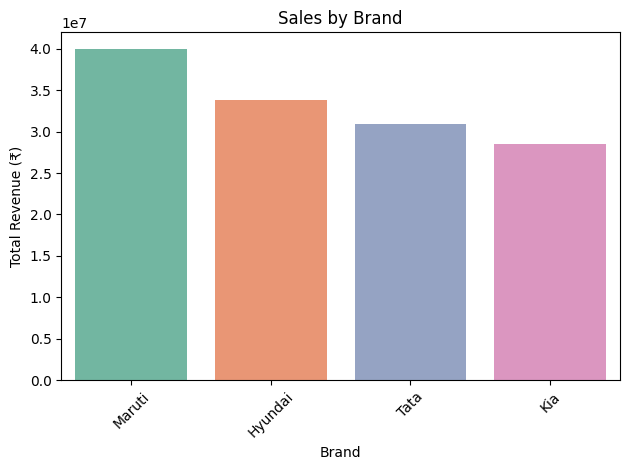

In [ ]:
brand_sales = sales_df.groupby('Brand')['Price'].sum().sort_values(ascending=False)

sns.barplot(x=brand_sales.index, y=brand_sales.values, palette='Set2')
plt.title("Sales by Brand")
plt.ylabel("Total Revenue (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Most Common Service Issues**

/tmp/ipython-input-11-1049259722.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=issue_counts.values, y=issue_counts.index, palette='coolwarm')


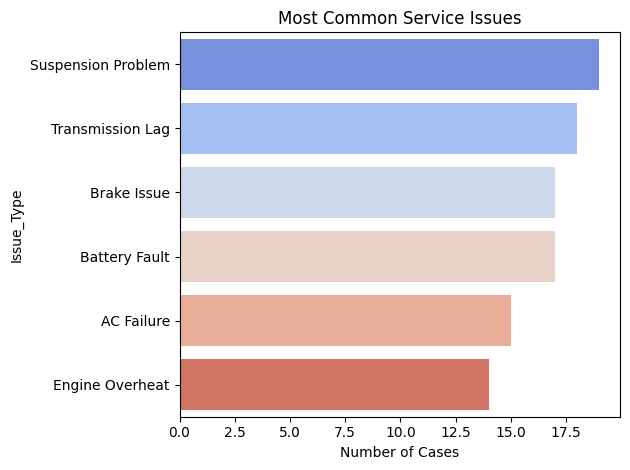

In [ ]:

issue_counts = service_df['Issue_Type'].value_counts()

sns.barplot(x=issue_counts.values, y=issue_counts.index, palette='coolwarm')
plt.title("Most Common Service Issues")
plt.xlabel("Number of Cases")
plt.tight_layout()
plt.show()

**Resolution Time vs Customer Satisfaction**


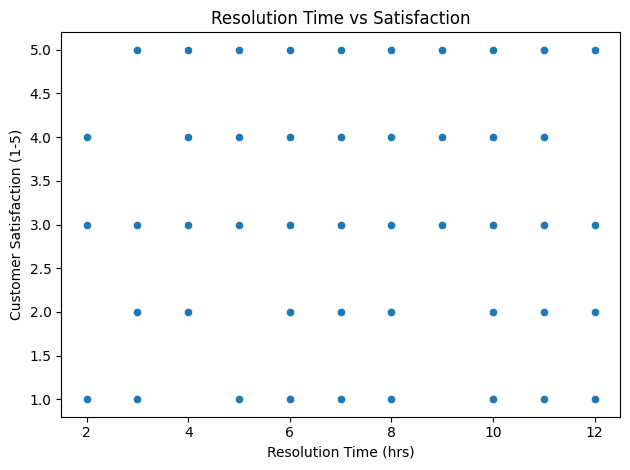

In [ ]:
sns.scatterplot(x='Resolution_Time_Hrs', y='Customer_Satisfaction', data=service_df)
plt.title("Resolution Time vs Satisfaction")
plt.xlabel("Resolution Time (hrs)")
plt.ylabel("Customer Satisfaction (1-5)")
plt.tight_layout()
plt.show()


**Dealer Performance Summary**


In [ ]:
sales_dealer = sales_df.groupby('Dealer_Name')['Price'].sum()
satisfaction_dealer = service_df.groupby('Dealer_Name')['Customer_Satisfaction'].mean()

dealer_summary = pd.concat([sales_dealer, satisfaction_dealer], axis=1).reset_index()
dealer_summary.columns = ['Dealer_Name', 'Total_Sales', 'Avg_Satisfaction']
dealer_summary


,Dealer_Name,Total_Sales,Avg_Satisfaction
0,DriveNow,20522931,2.538462
1,Elite Motors,30780725,3.680000
2,Metro Cars,28213576,2.882353
3,SpeedX,30633289,3.450000
4,Wheels Auto,23002271,3.160000
